# Exploratory Data Analysis

## Setup

In [1]:
# Importing libraries:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [18]:
# Importing our dataset

path = os.getcwd()

df = pd.read_csv(path + "/data/pga_ready_for_eda_pca.csv")

In [3]:
df # We'll work from this dataset, the one we created in the ML notebook

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster
0,Aaron Baddeley,700.0,53.427778,293.677778,61.945556,28.295556,60.074444,71.008444,5103,2.0,21.0,0.473333,0.152444,-0.342667,-0.310333,0.333111,10419470,9,1
1,Aaron Watkins,46.0,63.030000,277.100000,62.250000,28.750000,59.530000,71.770000,126,0.0,1.0,0.402000,-0.589000,-0.568000,-0.707000,0.285000,217495,1,4
2,Aaron Wise,90.0,63.330000,302.900000,68.810000,29.150000,56.280000,70.247000,1086,1.0,3.0,0.238000,0.703000,0.410000,0.012000,0.042000,3486407,1,2
3,Abraham Ancer,149.0,64.530000,286.250000,64.150000,28.985000,59.680000,71.398000,736,0.0,4.0,-0.238500,-0.203500,0.150500,-0.133000,0.017500,1839506,2,4
4,Adam Hadwin,378.0,64.375000,289.600000,66.387500,28.847500,59.680000,70.768250,3207,1.0,13.0,0.319750,0.486250,0.075000,0.026250,0.043250,7392920,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Zac Blair,376.0,67.557500,275.150000,64.765000,28.802500,63.617500,71.106500,1631,0.0,4.0,0.240000,0.020000,-0.216750,-0.188750,0.186000,3266994,4,4
434,Zach Johnson,803.0,68.653333,282.144444,66.458889,28.727778,60.882222,70.107444,10935,5.0,42.0,0.362222,0.896778,0.052778,0.322222,0.165222,27540362,9,4
435,Zack Miller,86.0,57.060000,299.500000,61.790000,29.450000,54.260000,71.890000,290,0.0,1.0,-0.483000,-1.051000,0.057000,-0.612000,-0.012000,427341,1,3
436,Zecheng Dou,53.0,54.760000,291.900000,63.720000,30.000000,51.560000,72.773000,21,0.0,0.0,-0.667000,-1.198000,-0.079000,-0.265000,-0.187000,90993,1,3


In [4]:
# Explaination of columns:
#
# Year: The year of the tournament. This is a temporal dimension that might not directly contribute to 
# performance clustering unless you're interested in changes over time.
#
# Avg Distance: Average distance of tee shots. This measures the power of a golfer's drives.
#
# gir (Greens in Regulation): The percentage of times a golfer reaches the green in the number 
# of strokes deemed standard. It's a good indicator of approach play accuracy.
#
# Average Putts: The average number of putts per round. It reflects putting efficiency.
#
# Average Scrambling: The percentage of times a player misses the green in regulation but 
# still makes par or better. It's a measure of a player's ability to recover from a poor shot.
#
# Average Score: The average score per round. It's a direct indicator of overall performance.
#
# Points: Points earned in the season, often related to the FedExCup points system.
#
# Wins: The number of wins. This is a measure of ultimate success in tournaments.
#
# Top 10: The number of top-10 finishes. Like wins, it's a measure of consistent high performance.
#
# Average SG Putts (Strokes Gained: Putting): Measures a player's putting performance relative to the 
# field. It's a more sophisticated measure than average putts because it considers the difficulty of each putt.
#
# Average SG Total: Total strokes gained across all aspects of the game. It's an overall performance metric.
#
# SG:OTT (Strokes Gained: Off-The-Tee): Measures a player's performance off the tee.
#
# SG:APR (Strokes Gained: Approach): Measures a player's performance on approach shots.
#
# SG:ARG (Strokes Gained: Around-The-Green): Measures performance on shots taken around the green, 
# excluding putts.
#
# Money: The amount of prize money won. This is another indicator of success but can also reflect 
# the prestige of tournaments won.

## Exploring

In [19]:
# Making categorical column for top 10 finishers
df['Top 10 Finish'] = df['Top 10'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
# Mask

top10f = df["Top 10 Finish"] == 1

In [21]:
# DF

df10 = df.loc[top10f]

In [22]:
# Masks for clusters

c1 = df["cluster"] == 1
c2 = df["cluster"] == 2
c3 = df["cluster"] == 3
c4 = df["cluster"] == 4

In [23]:
# Creating dfs for each cluster

dfc1 = df.loc[c1]
dfc2 = df.loc[c2]
dfc3 = df.loc[c3]
dfc4 = df.loc[c4]

## Values that weren't in our clusteralgo

In [ ]:
# From our ML notebook
#
# X = adf.select_dtypes("number").copy()
# X = X.drop(columns=["Rounds", "No Seasons", "Points", "Wins", "Money", "Average Score", "Top 10",
#                     "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG", "Average SG Putts"], axis=1)

<Axes: xlabel='cluster', ylabel='Wins'>

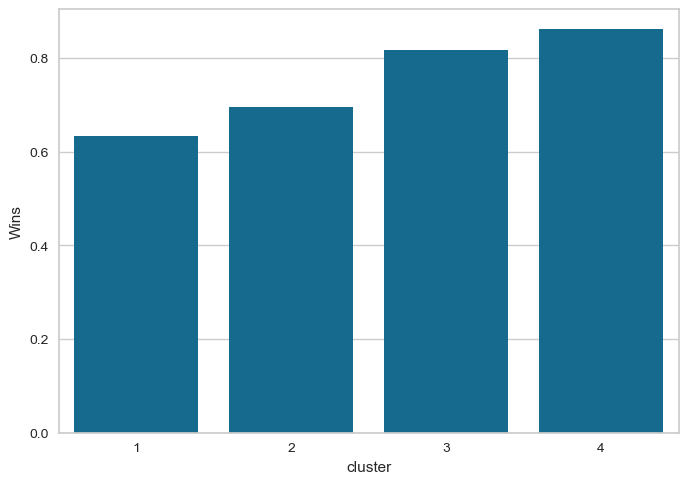

In [25]:
sns.barplot(data=df, x="cluster", y="Wins", estimator="mean", errorbar = None)

# Tier 5 is dominating

<Axes: xlabel='cluster', ylabel='Money'>

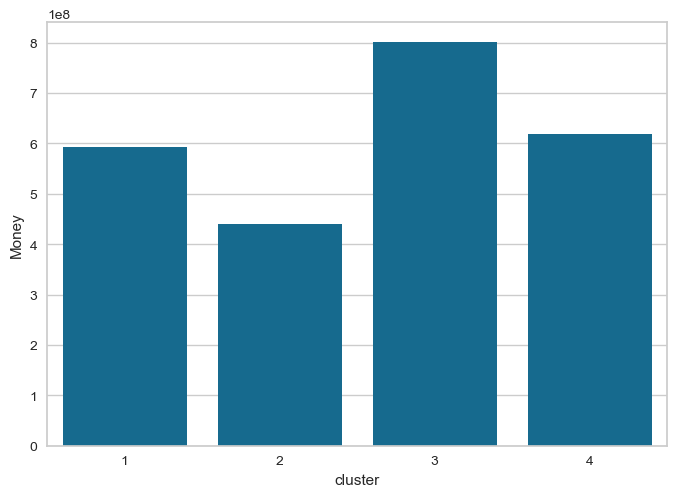

In [26]:
sns.barplot(data=df, x="cluster", y="Money", estimator="sum", errorbar = None)

<Axes: xlabel='cluster', ylabel='No Seasons'>

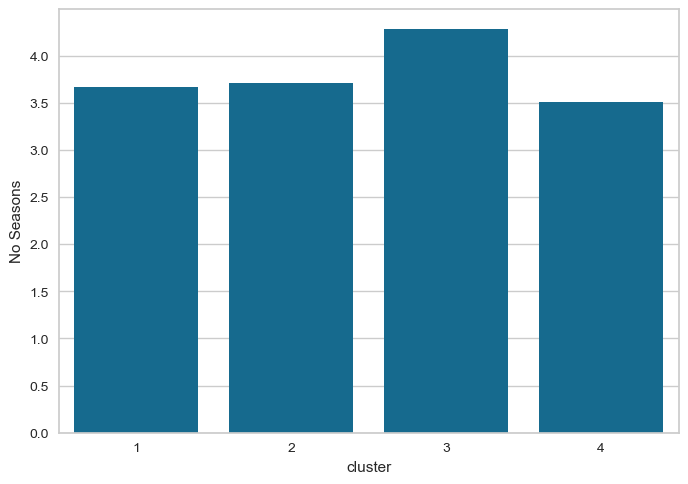

In [27]:
sns.barplot(data=df, x="cluster", y="No Seasons", estimator="mean", errorbar = None)

# NOTATION: While tier 4 has the highest number of seasons played / players
# Cluster has seen the metrics and predicted experience. 

<Axes: xlabel='cluster', ylabel='count'>

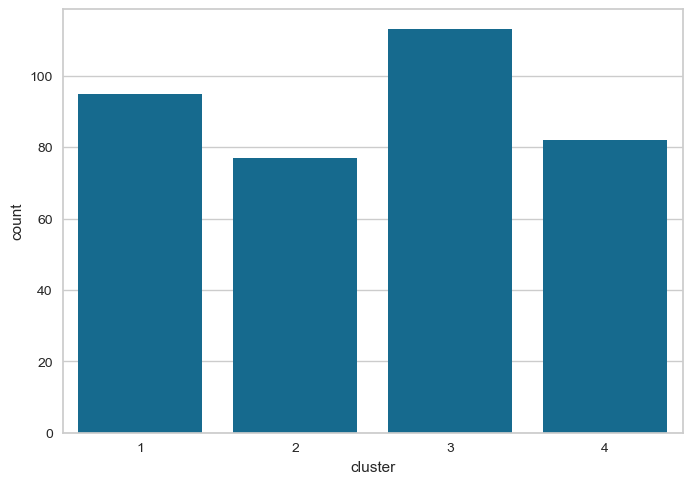

In [28]:
top10fins = df["Top 10"] > 0
top10 = df.loc[top10fins]
sns.countplot(data=top10, x="cluster")

## Values in our clusteralgo

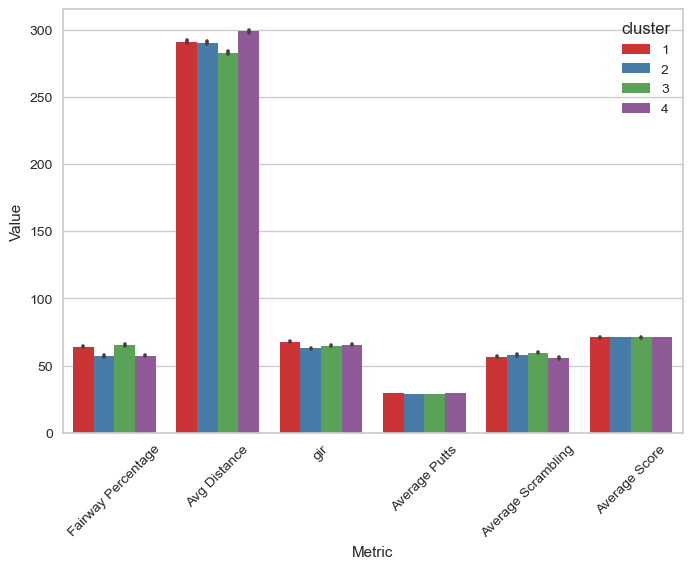

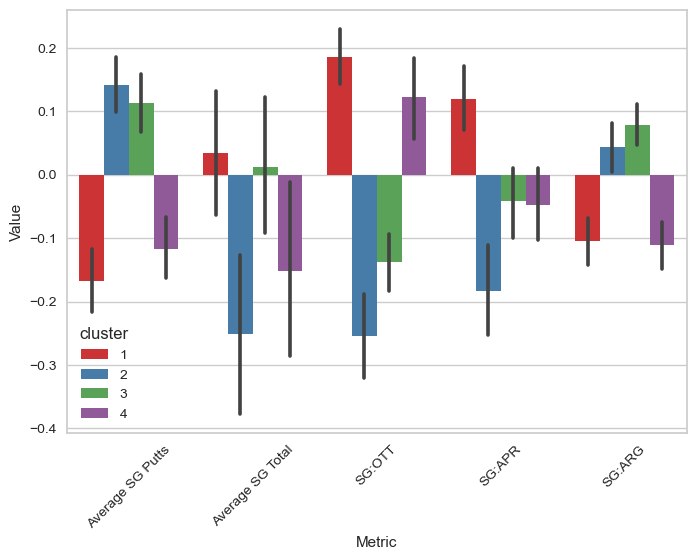

In [29]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Fairway Percentage', 'Avg Distance', 'gir',
       'Average Putts', 'Average Scrambling', 'Average Score'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45) 
plt.show()

long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'cluster'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45) 
plt.show()

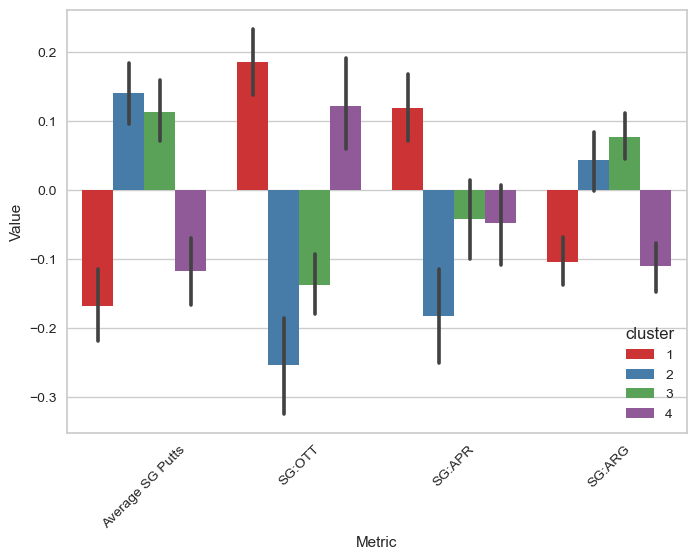

In [30]:
long_df = pd.melt(df, id_vars=['cluster'], value_vars=['Average SG Putts', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'cluster'],
                  var_name='Metric', value_name='Value')

sns.barplot(data=long_df, x='Metric', y='Value', hue='cluster', palette="Set1")
plt.xticks(rotation=45)
plt.show()

In [37]:
df.groupby("cluster")[["Top 10 Finish"]].mean()

,Top 10 Finish
cluster,
1,0.848214
2,0.836957
3,0.896825
4,0.759259


In [38]:
df.groupby("cluster")[["Top 10"]].mean()

,Top 10
cluster,
1,8.017857
2,7.586957
3,10.587302
4,8.712963


In [55]:
# NOTATIONS ON THE ABOVE

# Cluster 3 has the most top 10 finishers and also has generated the most money from the tournament
# Cluster 4 has the most wins.

# General characteristics:
# 
# Cluster 4 drives the furthest but also misses the most fairways 
# Cluster 4 is also bad at putting and scrambling
# Cluster 4 does hit many greens, however
#
# Cluster 3 Values accuracy over distance
# Cluster 3 Are good at putting and around the greens
# Cluster 3 They're alright at approches
# Cluster 3 are MASTERS of scrambling 
# Cluster 3 might be the most flexible players
#
# Cluster 2 thrives best closer to the greens, with mastery in putting and chipping
# Cluster 2 are awful off the tee, however. They drive the 2nd shortest and misses most of the fairways
#           which is contrary to the the accuracy vs distance correlation
# 
# Cluster 1 seems to balance distance and accuracy well. 
# Cluster 1 dominates off of the tee but gets worse and worse the closer they get to the green. '
# Cluster 1 hits a lot of greens though, most likely from further away considering their scramble is quite low

## A closer look off of the tee

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

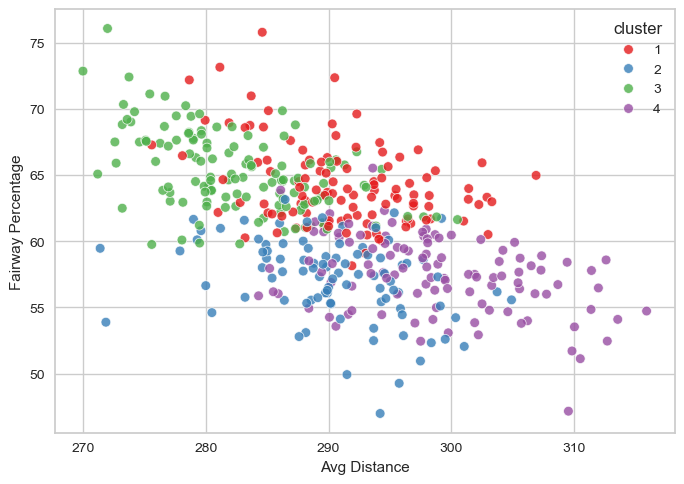

In [56]:
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

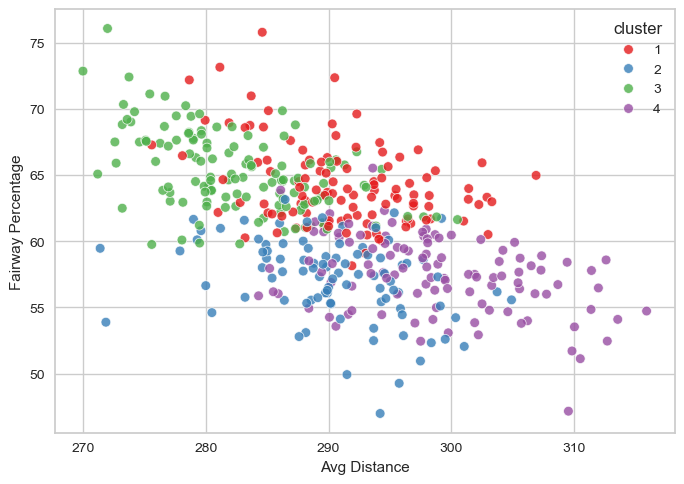

In [98]:
sns.scatterplot(data=df, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

In [ ]:
# From what I can see, there is big differences between 1 and 2 aswell as 3 and 4

In [62]:
df["Top 10"].corr(df["Money"])

0.9687986087888875

In [63]:
df["Wins"].corr(df["Money"])

0.8665678013129251

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

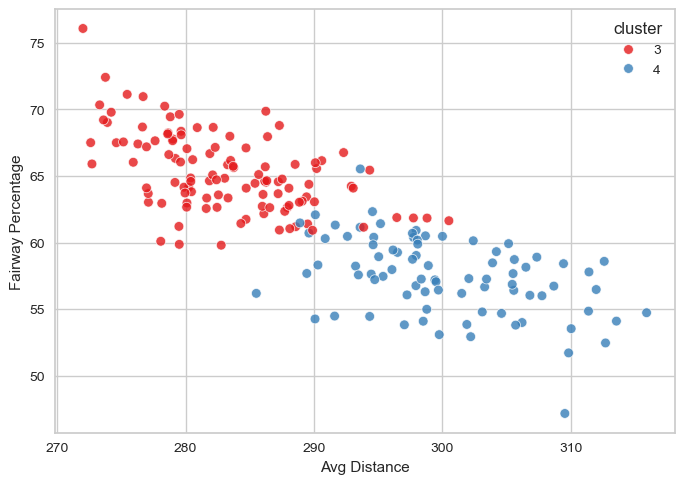

In [94]:
temp = df10.loc[c4 | c3]

sns.scatterplot(data=temp, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='Avg Distance', ylabel='Fairway Percentage'>

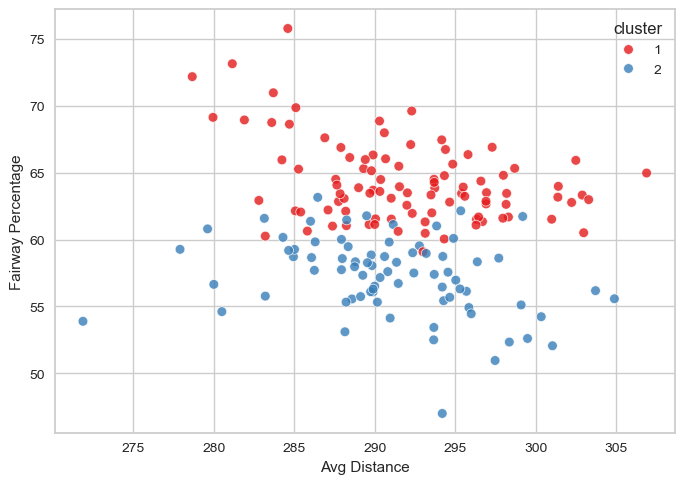

In [95]:
temp = df10.loc[c1 | c2]

sns.scatterplot(data=temp, x = "Avg Distance", y = "Fairway Percentage", hue="cluster", palette="Set1", alpha=.8)

## Getting closer to the hole

In [ ]:
# Getting closer to the green... Approach & Green in regulation (gir)

<Axes: xlabel='SG:APR', ylabel='gir'>

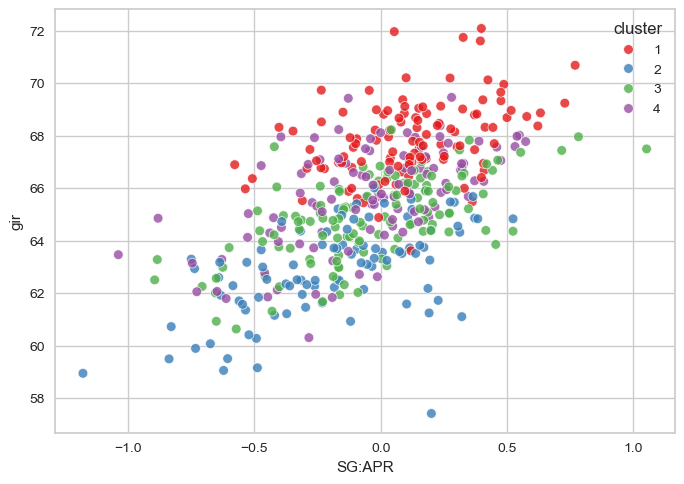

In [97]:
sns.scatterplot(data=df, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

In [ ]:
# Very hard to tell but I see diffs between 1 and two... Three and four seem kinda equal? We'll mask it

<Axes: xlabel='SG:APR', ylabel='gir'>

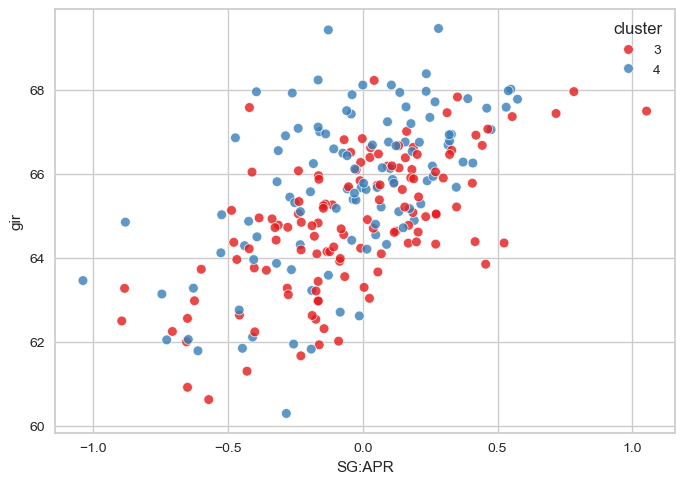

In [78]:
temp = df.loc[c4 | c3]

sns.scatterplot(data=temp, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:APR', ylabel='gir'>

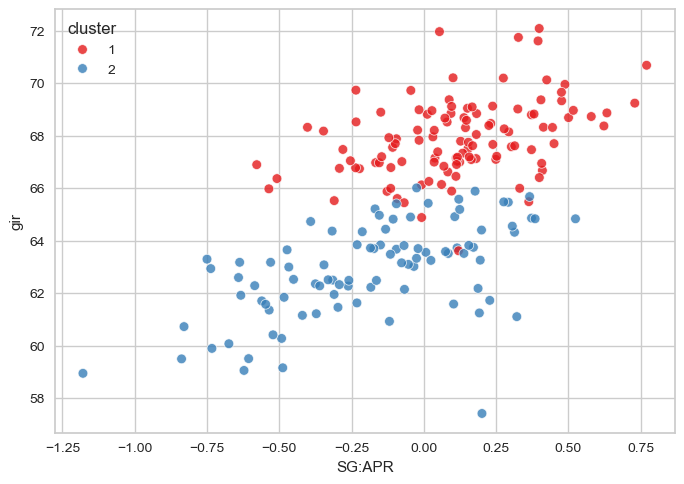

In [76]:
temp = df.loc[c1 | c2]

sns.scatterplot(data=temp, x = "SG:APR", y = "gir", hue="cluster", palette="Set1", alpha=.8)

## Final stretch! Putting & chipping

<Axes: xlabel='SG:ARG', ylabel='Average Putts'>

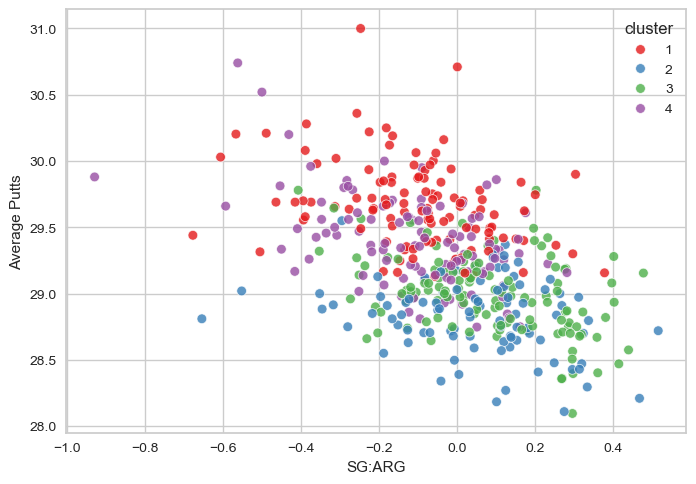

In [80]:
sns.scatterplot(data=df, x = "SG:ARG", y = "Average Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average Putts'>

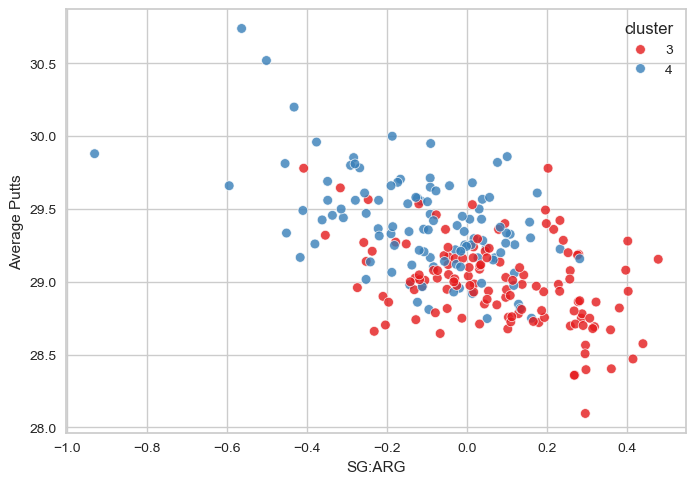

In [81]:
temp = df.loc[c4 | c3]

sns.scatterplot(data=temp, x = "SG:ARG", y = "Average Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average Putts'>

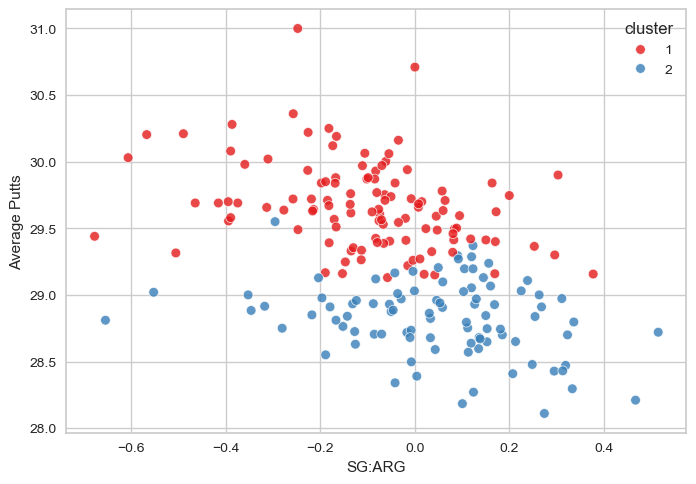

In [82]:
temp = df.loc[c1 | c2]

sns.scatterplot(data=temp, x = "SG:ARG", y = "Average Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average Putts'>

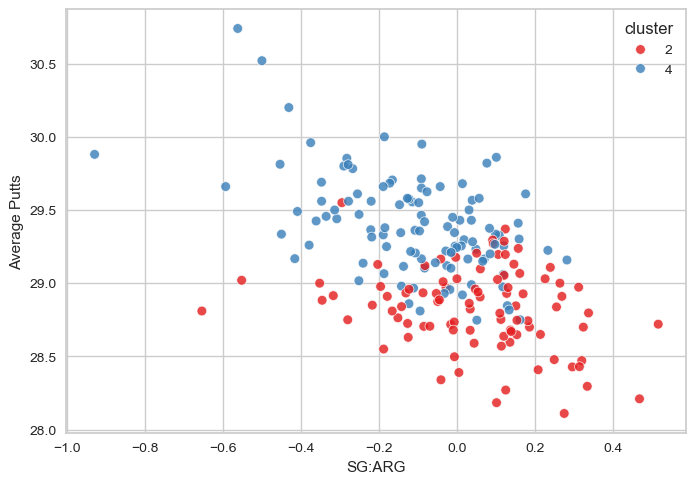

In [84]:
temp = df.loc[c2 | c4]

sns.scatterplot(data=temp, x = "SG:ARG", y = "Average Putts", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='SG:ARG', ylabel='Average Scrambling'>

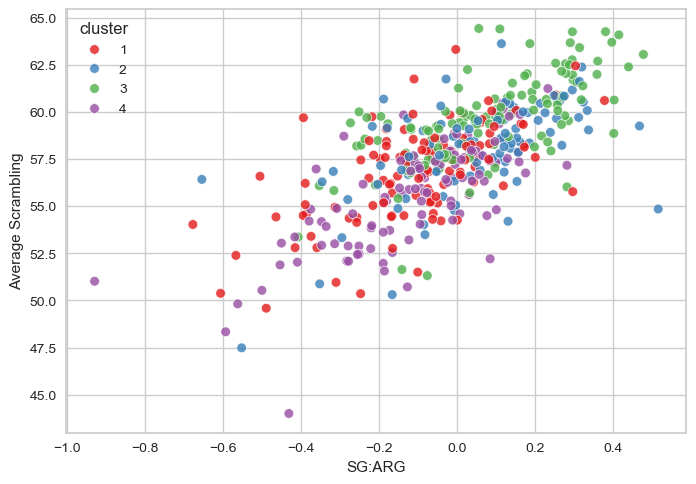

In [87]:
# Misc.

sns.scatterplot(data=df, x = "SG:ARG", y = "Average Scrambling", hue="cluster", palette="Set1", alpha=.8)

<Axes: xlabel='Average Putts', ylabel='Average Scrambling'>

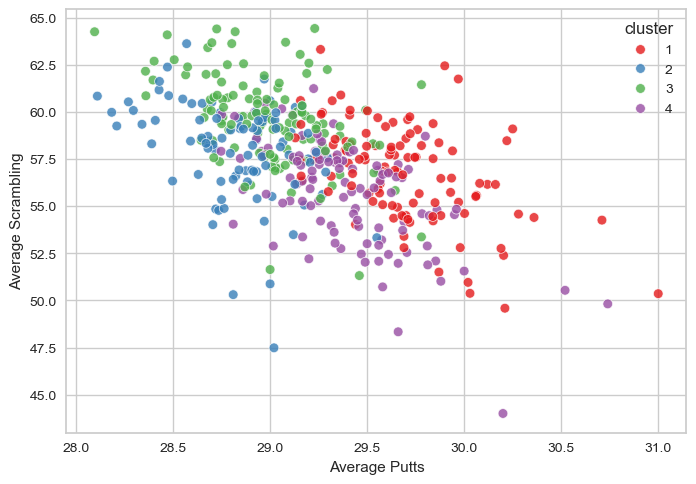

In [88]:
sns.scatterplot(data=df, x = "Average Putts", y = "Average Scrambling", hue="cluster", palette="Set1", alpha=.8)

In [ ]:
sns.scatterplot(data=df, x = "Average Putts", y = "Average Scrambling", hue="cluster", palette="Set1", alpha=.8)

In [41]:
df.loc[df["Player Name"] == "Tiger Woods"] # "The Artist"

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
395,Tiger Woods,137.0,61.64,300.5,67.49,28.7,63.665,69.127,3431,3.0,11.0,0.3025,1.953,0.307,1.0535,0.2895,11576999,2,3,1


In [43]:
df.loc[df["Player Name"] == "Henrik Stenson"]

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
164,Henrik Stenson,295.0,69.62,292.3,70.678,29.78,58.212,69.7248,4360,0.0,19.0,0.0336,1.3776,0.5156,0.7704,0.0576,16509129,5,1,1


In [44]:
df.loc[df["Player Name"] == "Phil Mickelson"] # Can get out of any situation

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
311,Phil Mickelson,703.0,54.915556,295.855556,64.827778,28.477778,60.86,70.037778,12351,6.0,41.0,0.310444,1.092556,0.009778,0.524444,0.248333,32317468,9,2,1


In [46]:
df.loc[df["Player Name"] == "Dustin Johnson"] # Bombs drives

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
133,Dustin Johnson,583.0,56.47375,311.975,68.0125,28.95625,57.9125,69.706125,13546,11.0,52.0,0.032625,1.374875,0.8005,0.549375,-0.019125,42088309,8,4,1


In [47]:
df.loc[df["Player Name"] == "John Daly"]

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
205,John Daly,113.0,53.995,306.2,63.87,29.335,53.04,71.288,395,0.0,1.0,-0.2305,-0.6975,0.304,-0.3205,-0.451,647092,2,4,1


In [50]:
df.loc[df["Player Name"] == "Rory McIlroy"] 

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
335,Rory McIlroy,420.0,58.417143,309.428571,67.05,28.817143,59.765714,69.545286,9482,7.0,43.0,-0.062429,1.525143,0.959571,0.476143,0.132857,33315834,7,4,1


In [51]:
df.loc[df["Player Name"] == "Jordan Spieth"] 

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
218,Jordan Spieth,430.0,61.152,293.86,66.674,28.358,62.154,69.5768,8709,6.0,33.0,0.3166,1.368,0.3278,0.4432,0.2674,25987607,5,3,1


In [53]:
df.loc[df["Player Name"] == "Bubba Watson"] # Bombs drives

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
71,Bubba Watson,686.0,57.793333,311.411111,68.377778,29.464444,55.94,70.185444,13773,12.0,40.0,-0.114,0.998778,0.965444,0.235667,-0.092333,36804576,9,4,1


In [89]:
# Saving for Explanatory DA

In [90]:
df.to_csv((path + '/data/pga_ready_for_expla_pca.csv'), index=False)

In [91]:
df

,Player Name,Rounds,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,No Seasons,cluster,Top 10 Finish
0,Aaron Baddeley,700.0,53.427778,293.677778,61.945556,28.295556,60.074444,71.008444,5103,2.0,21.0,0.473333,0.152444,-0.342667,-0.310333,0.333111,10419470,9,2,1
1,Aaron Watkins,46.0,63.030000,277.100000,62.250000,28.750000,59.530000,71.770000,126,0.0,1.0,0.402000,-0.589000,-0.568000,-0.707000,0.285000,217495,1,3,1
2,Aaron Wise,90.0,63.330000,302.900000,68.810000,29.150000,56.280000,70.247000,1086,1.0,3.0,0.238000,0.703000,0.410000,0.012000,0.042000,3486407,1,1,1
3,Abraham Ancer,149.0,64.530000,286.250000,64.150000,28.985000,59.680000,71.398000,736,0.0,4.0,-0.238500,-0.203500,0.150500,-0.133000,0.017500,1839506,2,3,1
4,Adam Hadwin,378.0,64.375000,289.600000,66.387500,28.847500,59.680000,70.768250,3207,1.0,13.0,0.319750,0.486250,0.075000,0.026250,0.043250,7392920,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Zac Blair,376.0,67.557500,275.150000,64.765000,28.802500,63.617500,71.106500,1631,0.0,4.0,0.240000,0.020000,-0.216750,-0.188750,0.186000,3266994,4,3,1
434,Zach Johnson,803.0,68.653333,282.144444,66.458889,28.727778,60.882222,70.107444,10935,5.0,42.0,0.362222,0.896778,0.052778,0.322222,0.165222,27540362,9,3,1
435,Zack Miller,86.0,57.060000,299.500000,61.790000,29.450000,54.260000,71.890000,290,0.0,1.0,-0.483000,-1.051000,0.057000,-0.612000,-0.012000,427341,1,4,1
436,Zecheng Dou,53.0,54.760000,291.900000,63.720000,30.000000,51.560000,72.773000,21,0.0,0.0,-0.667000,-1.198000,-0.079000,-0.265000,-0.187000,90993,1,4,0
